# Treinamento de modelos por reforço (IA faculdade)

## Treinamento do modelo por reforço com dados de iris e modelo cluster KMeans


In [1]:
# import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
# Carregar o conjunto de dados Iris (ou qualquer outro conjunto de dados relevante)
iris = load_iris()
X = iris.data

In [3]:
# Definir o número de clusters
n_clusters = 3

# Criar um objeto K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Treinar o modelo K-Means com os dados
kmeans.fit(X)

# Obter os rótulos dos clusters para cada ponto de dados
labels = kmeans.labels_

c:\Users\Renan Rodrigues\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


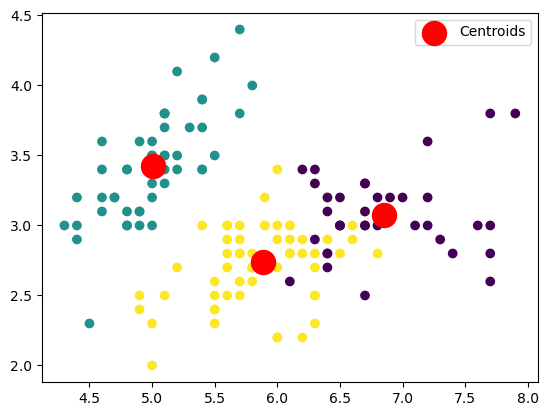

In [4]:
# Visualizar os clusters (exemplo de visualização 2D, usando as duas primeiras características)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap="viridis")
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    s=300,
    c="red",
    label="Centroids",
)
plt.legend()
plt.show()

## Treinamento do modelo por reforço para game com GYM


In [6]:
!pip install gym

  Using cached gym-0.26.2.tar.gz (721 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached gym_notices-0.1.0-py3-none-any.whl.metadata (1.2 kB)
Using cached gym_notices-0.1.0-py3-none-any.whl (3.3 kB)
  Created wheel for gym: filename=gym-0.26.2-py3-none-any.whl size=827740 sha256=4bdd9552e4f242ddfabc2b4ffa91d97e444730324fd2016a5e146c408b33ef4e
  Stored in directory: c:\users\renan rodrigues\appdata\local\pip\cache\wheels\95\51\6c\9bb05ebbe7c5cb8171dfaa3611f32622ca4658d53f31c79077
Successfully built gym

   -------------------- ------------------- 1/2 [gym]
   -------------------- ------------------- 1/2 [gym]
   -------------------- ------------------- 1/2 [gym]
   -------------------- --------

In [ ]:
import numpy as np
import gym

In [ ]:
# Crie o ambiente FrozenLake
env = gym.make(
    "FrozenLake-v1", is_slippery=False
)  # O parâmetro is_slippery=False torna o ambiente determinístico

In [ ]:
# Defina os parâmetros do Q-Learning
learning_rate = 0.1
discount_factor = 0.99
num_episodes = 1000
epsilon = 0.1

# Inicialize a tabela Q com zeros
num_states = env.observation_space.n
num_actions = env.action_space.n
Q = np.zeros((num_states, num_actions))

In [ ]:
# Função para escolher uma ação com base na política epsilon-greedy
def choose_action(state):
    if np.random.rand() < epsilon:
        return env.action_space.sample()  # Ação aleatória com probabilidade epsilon
    else:
        return np.argmax(Q[state, :])  # Ação com maior valor Q

In [ ]:

# Treinamento do agente
for episode in range(num_episodes):
    state = env.reset()
    done = False

    while not done:
        action = choose_action(state)
        next_state, reward, done, _ = env.step(action)

        # Atualize a tabela Q usando a fórmula do Q-Learning
        Q[state, action] = (1 - learning_rate) * Q[state, action] + learning_rate * (
            reward + discount_factor * np.max(Q[next_state, :])
        )

        state = next_state

In [ ]:
# Avaliação do agente treinado
total_rewards = 0
num_eval_episodes = 100
for _ in range(num_eval_episodes):
    state = env.reset()
    done = False

    while not done:
        action = np.argmax(Q[state, :])
        next_state, reward, done, _ = env.step(action)
        total_rewards += reward
        state = next_state

average_reward = total_rewards / num_eval_episodes
print(
    f"Média de recompensa em {num_eval_episodes} episódios de avaliação: {average_reward}"
)